In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("layoffs.csv")

In [3]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Cushion,SF Bay Area,Finance,NaN,1.00,2025-01-30,Series A,United States,20.0
1,Placer.ai,SF Bay Area,Data,150.0,0.18,2025-01-29,Unknown,United States,267.0
2,Amazon,Seattle,Retail,NaN,NaN,2025-01-29,Post-IPO,United States,8100.0
3,Digital River,Minneapolis,Retail,122.0,NaN,2025-01-28,Private Equity,United States,50.0
4,Moon Active,Tel Aviv,Consumer,NaN,NaN,2025-01-27,Unknown,Israel,425.0


In [4]:
df.shape

(3951, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3951 non-null   object 
 1   location             3950 non-null   object 
 2   industry             3950 non-null   object 
 3   total_laid_off       2571 non-null   float64
 4   percentage_laid_off  2522 non-null   float64
 5   date                 3951 non-null   object 
 6   stage                3944 non-null   object 
 7   country              3951 non-null   object 
 8   funds_raised         3518 non-null   float64
dtypes: float64(3), object(6)
memory usage: 277.9+ KB


In [6]:
df.astype({'total_laid_off': 'Int64', 'date':'datetime64[ns]'})

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Cushion,SF Bay Area,Finance,<NA>,1.00,2025-01-30,Series A,United States,20.0
1,Placer.ai,SF Bay Area,Data,150,0.18,2025-01-29,Unknown,United States,267.0
2,Amazon,Seattle,Retail,<NA>,NaN,2025-01-29,Post-IPO,United States,8100.0
3,Digital River,Minneapolis,Retail,122,NaN,2025-01-28,Private Equity,United States,50.0
4,Moon Active,Tel Aviv,Consumer,<NA>,NaN,2025-01-27,Unknown,Israel,425.0
...,...,...,...,...,...,...,...,...,...
3946,Service,Los Angeles,Travel,<NA>,1.00,2020-03-16,Seed,United States,5.1
3947,HopSkipDrive,Los Angeles,Transportation,8,0.10,2020-03-13,Unknown,United States,45.0
3948,Panda Squad,SF Bay Area,Consumer,6,0.75,2020-03-13,Seed,United States,1.0
3949,Tamara Mellon,Los Angeles,Retail,20,0.40,2020-03-12,Series C,United States,90.0


In [7]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,2571.000000,2522.000000,3518.000000
mean,266.206534,0.290082,803.356309
std,866.791221,0.298447,4635.566704
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,52.000000
50%,82.000000,0.170000,168.000000
75%,200.000000,0.320000,473.500000
max,15000.000000,1.000000,121900.000000


In [8]:
df.duplicated().sum()

np.int64(2)

In [9]:
df.drop_duplicates()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Cushion,SF Bay Area,Finance,NaN,1.00,2025-01-30,Series A,United States,20.0
1,Placer.ai,SF Bay Area,Data,150.0,0.18,2025-01-29,Unknown,United States,267.0
2,Amazon,Seattle,Retail,NaN,NaN,2025-01-29,Post-IPO,United States,8100.0
3,Digital River,Minneapolis,Retail,122.0,NaN,2025-01-28,Private Equity,United States,50.0
4,Moon Active,Tel Aviv,Consumer,NaN,NaN,2025-01-27,Unknown,Israel,425.0
...,...,...,...,...,...,...,...,...,...
3946,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
3947,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3948,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3949,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [10]:
df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1380
percentage_laid_off    1429
date                      0
stage                     7
country                   0
funds_raised            433
dtype: int64

In [11]:
df.isna().any(axis=1).sum()

np.int64(2326)

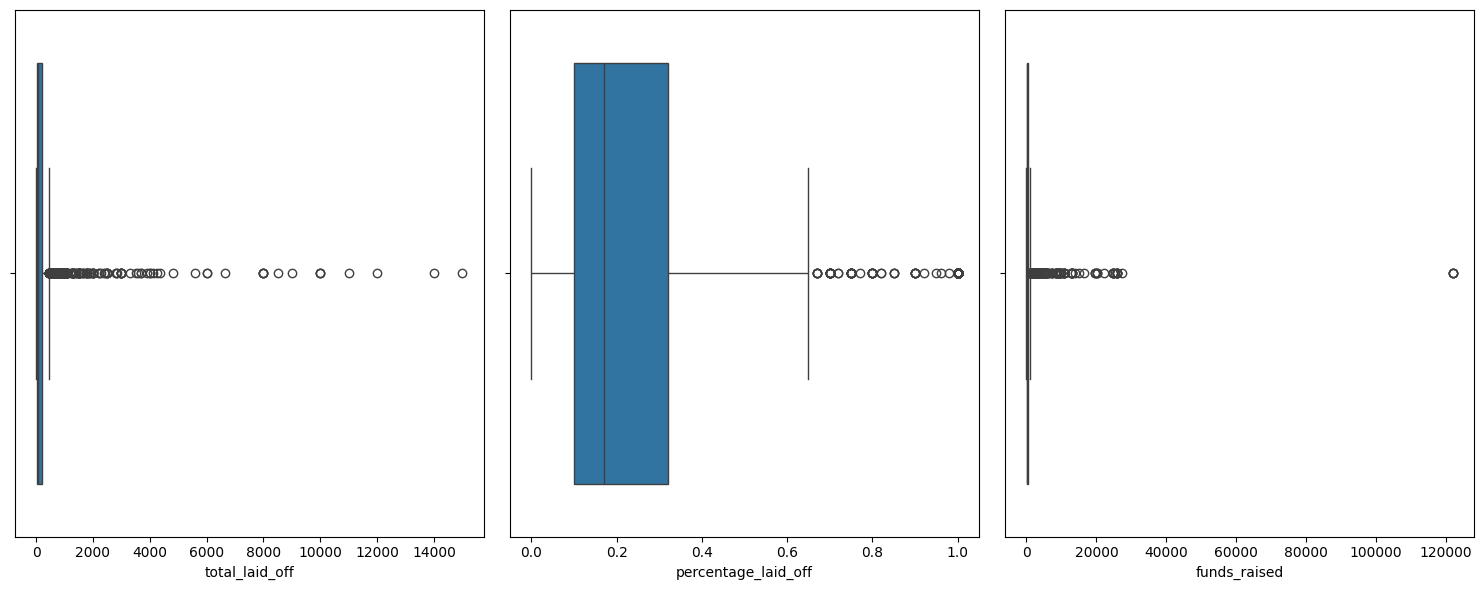

In [12]:
# Box plots to check for outliers
plt.figure(figsize = (15,6))

categorical_df = df.select_dtypes(include='object')
numerical_df = df.select_dtypes(exclude='object')

num_plots = len(numerical_df.columns)  # Count numerical columns
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust row count
for i, cols in enumerate(numerical_df.columns):
    plt.subplot(rows,3,i+1)
    sns.boxplot(data = numerical_df,x = cols)
plt.tight_layout()
plt.show()

In [13]:
# Remove (I'll just check first) outliers
df[df['funds_raised']>40000]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2564,Netflix,SF Bay Area,Media,30.0,NaN,2022-09-14,Post-IPO,United States,121900.0
2985,Netflix,SF Bay Area,Media,300.0,0.03,2022-06-23,Post-IPO,United States,121900.0
3174,Netflix,SF Bay Area,Media,150.0,0.01,2022-05-17,Post-IPO,United States,121900.0
3210,Netflix,SF Bay Area,Media,25.0,NaN,2022-04-28,Post-IPO,United States,121900.0


In [14]:
df_cleaned_numlayoff = df.dropna(subset=['total_laid_off'])

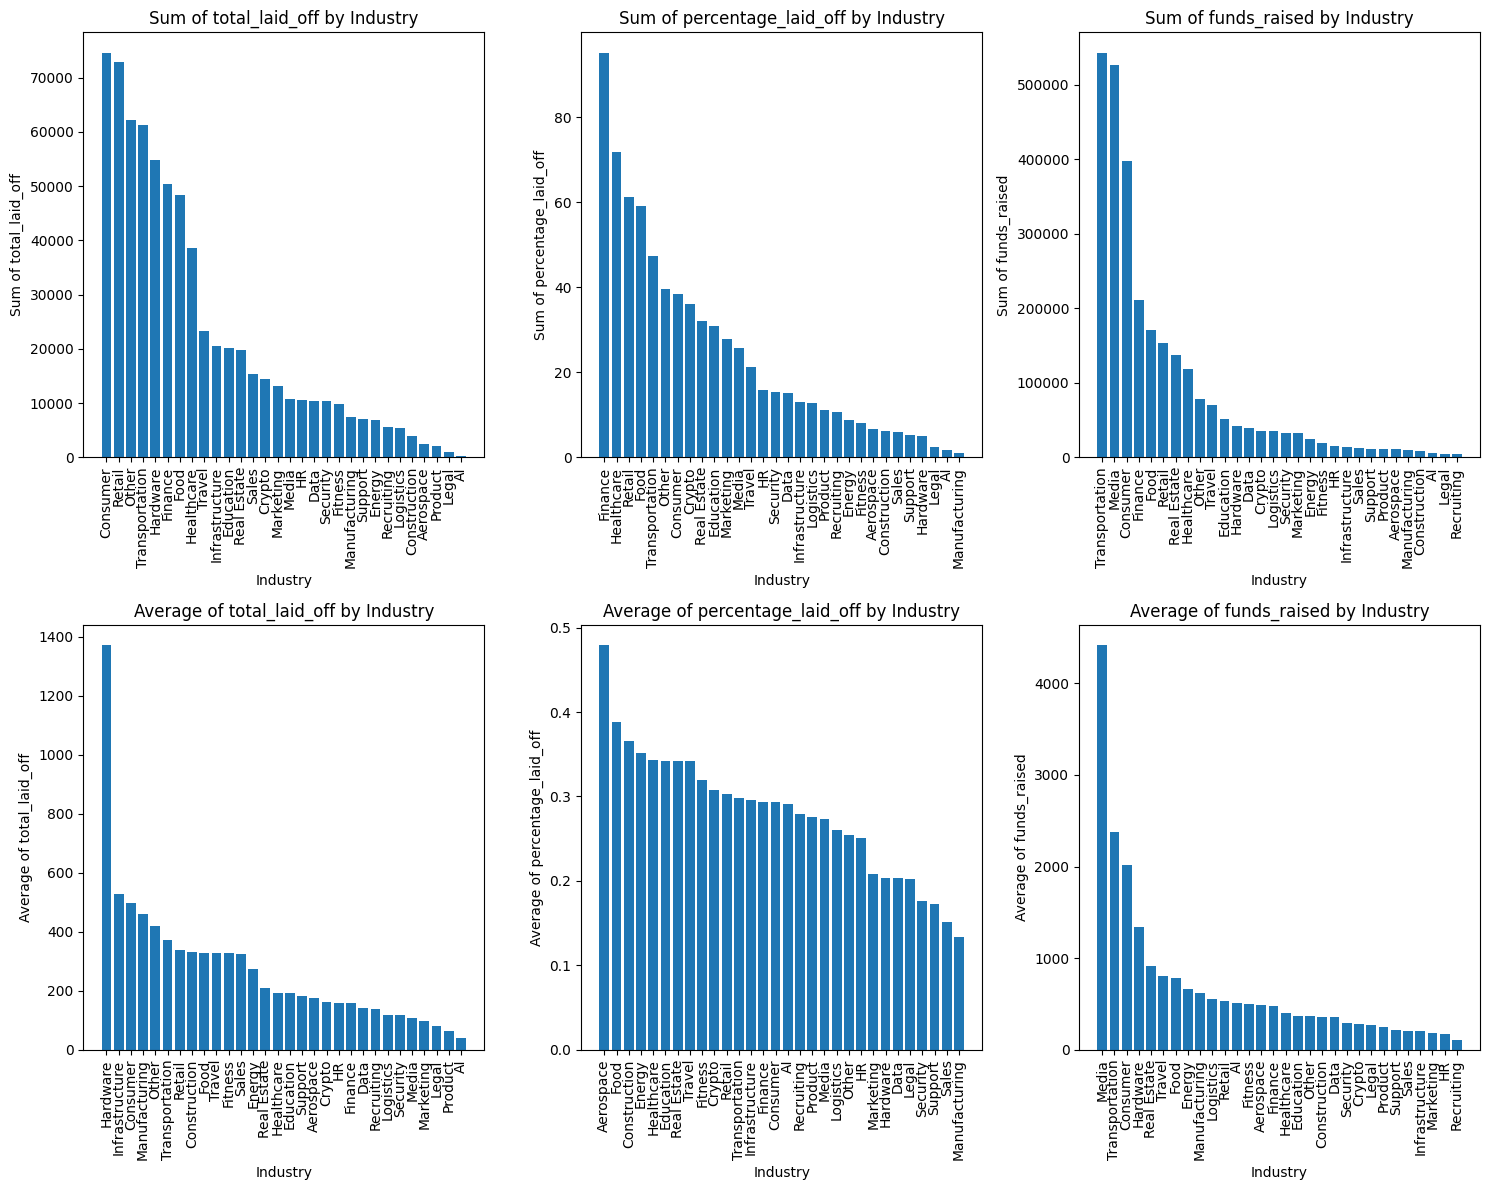

In [15]:
# Plot Bar Charts : Values by Industry
#data_to_plot = []
num_plots = len(numerical_df.columns)  
rows = 2 * ((num_plots // 3) + (num_plots % 3 > 0))  # Adjust row count

plt.figure(figsize = (15,12))
for i, column in enumerate(numerical_df.columns):
   
    # Grouping location and summing each column values
    industry_summary = df.groupby('industry')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    industry_summary = industry_summary.sort_values(by=column, ascending=False)

    # Grouping location and averaging each column values
    industry_mean = df.groupby('industry')[column].mean().reset_index()
    # Sorting in descending order for better visualisation
    industry_mean = industry_mean.sort_values(by=column, ascending=False)

     # plot first at the top position
    plt.subplot(rows,3,i+1)
    
    plt.bar(industry_summary['industry'],industry_summary[column])
    plt.title(f"Sum of {column} by Industry")
    plt.xlabel('Industry')
    plt.ylabel(f'Sum of {column}')
    plt.xticks(rotation=90) # Rotate x labels for better visibility

    # Plot below the above one
    plt.subplot(rows,3,i+4)
    
    plt.bar(industry_mean['industry'],industry_mean[column])
    plt.title(f"Average of {column} by Industry")
    plt.xlabel('Industry')
    plt.ylabel(f'Average of {column}')
    plt.xticks(rotation=90) # Rotate x labels for better visibility
    #axes[i].bar(data_to_plot[column],data_to_plot['industry'])
plt.tight_layout() # adjusts plot to fit labels
plt.show()       

In [16]:
# Why not Create a function that generates barcharts

def plot_barchart(df, parameter):
    num_plots = len(numerical_df.columns)  
    rows = 2 * ((num_plots // 3) + (num_plots % 3 > 0))  # Adjust row count to accomodate top and bottom (sum $ avg)
    
    plt.figure(figsize = (15,12))
    
    for i, column in enumerate(numerical_df.columns):
        
        # Grouping parameter and summing each column values
        parameter_summary = df.groupby(parameter)[column].sum().reset_index()
        # Sorting in descending order for better visualisation
        parameter_summary = parameter_summary.sort_values(by=column, ascending=False)

        # Grouping location and averaging each column values
        parameter_mean = df.groupby(parameter)[column].mean().reset_index()
        # Sorting in descending order for better visualisation
        parameter_mean = parameter_mean.sort_values(by=column, ascending=False)
        
        # plot first at the top position
        plt.subplot(rows,3,i+1)
        
        plt.bar(parameter_summary[parameter],parameter_summary[column])
        plt.title(f"Sum of {column} by {parameter}")
        plt.xlabel(parameter)
        plt.ylabel(column)
        plt.xticks(rotation=90) # Rotate x labels for better visibility

        # Plot below the above one
        plt.subplot(rows,3,i+4)
        
        plt.bar(parameter_mean[parameter],parameter_mean[column])
        plt.title(f"Average of {column} by {parameter}")
        plt.xlabel(parameter)
        plt.ylabel(f'Average of {column}')
        plt.xticks(rotation=90) # Rotate x labels for better visibility
        #axes[i].bar(data_to_plot[column],data_to_plot['industry'])
    plt.tight_layout() # adjusts plot to fit labels
    plt.show()

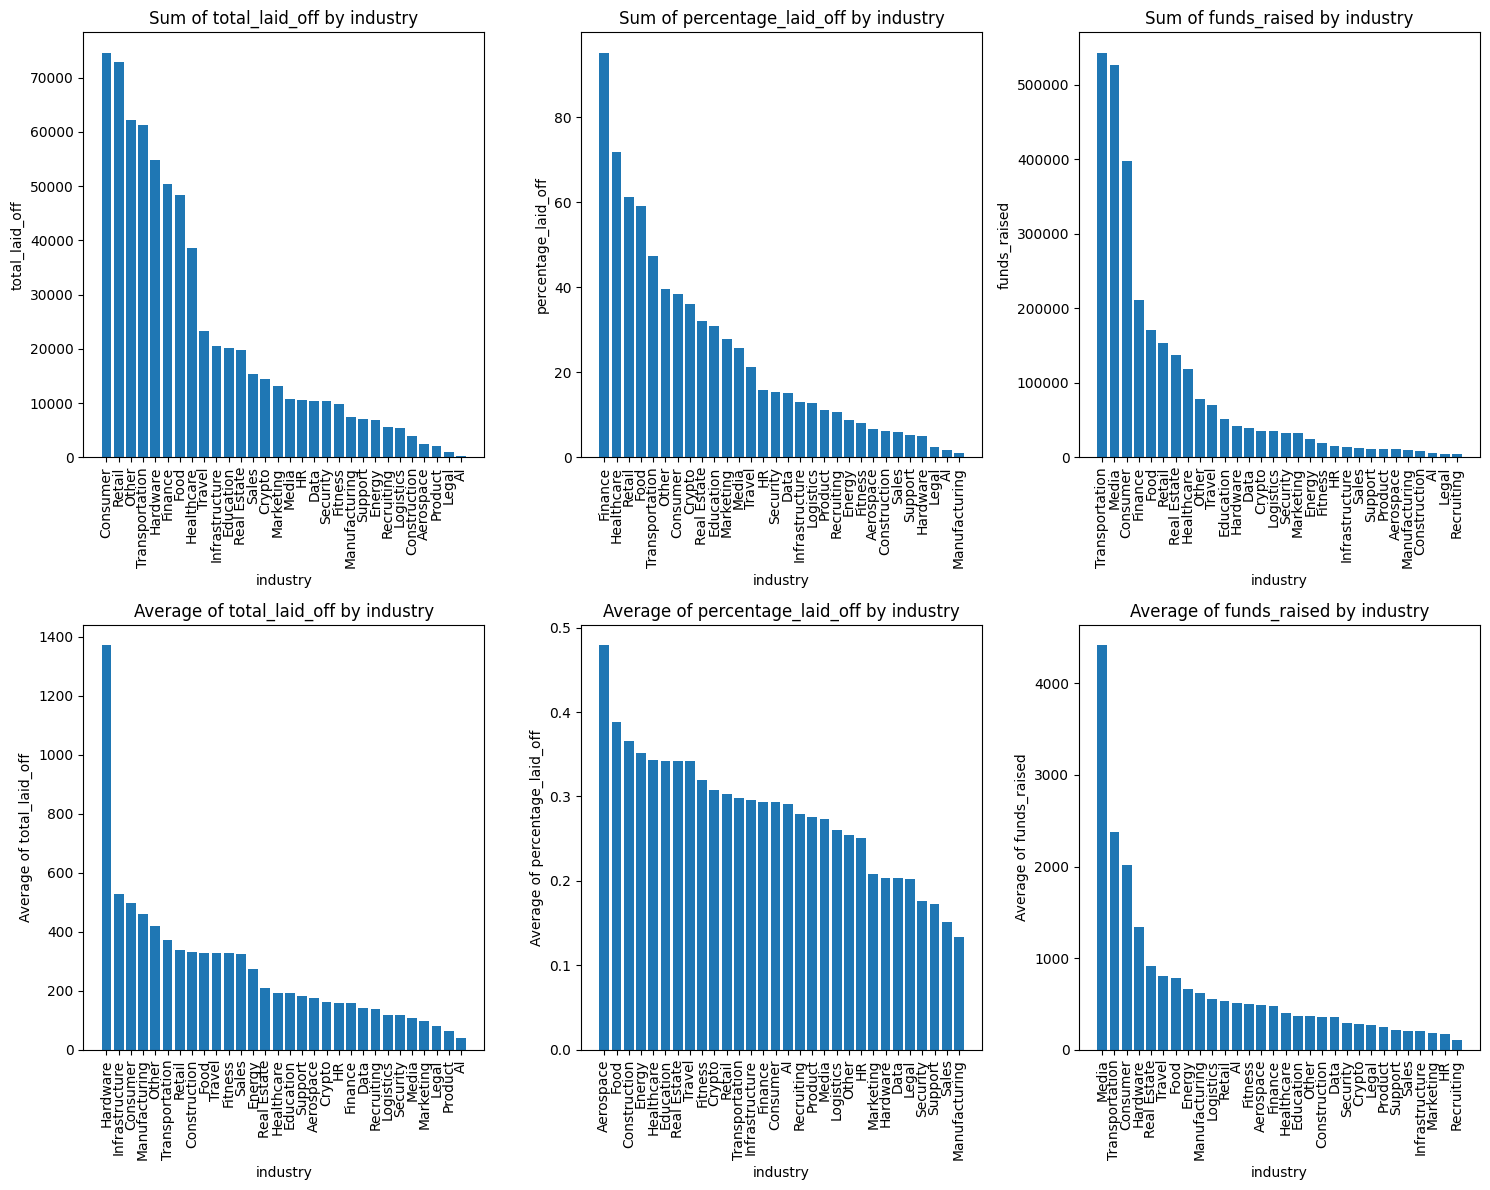

In [17]:
plot_barchart(df, "industry")

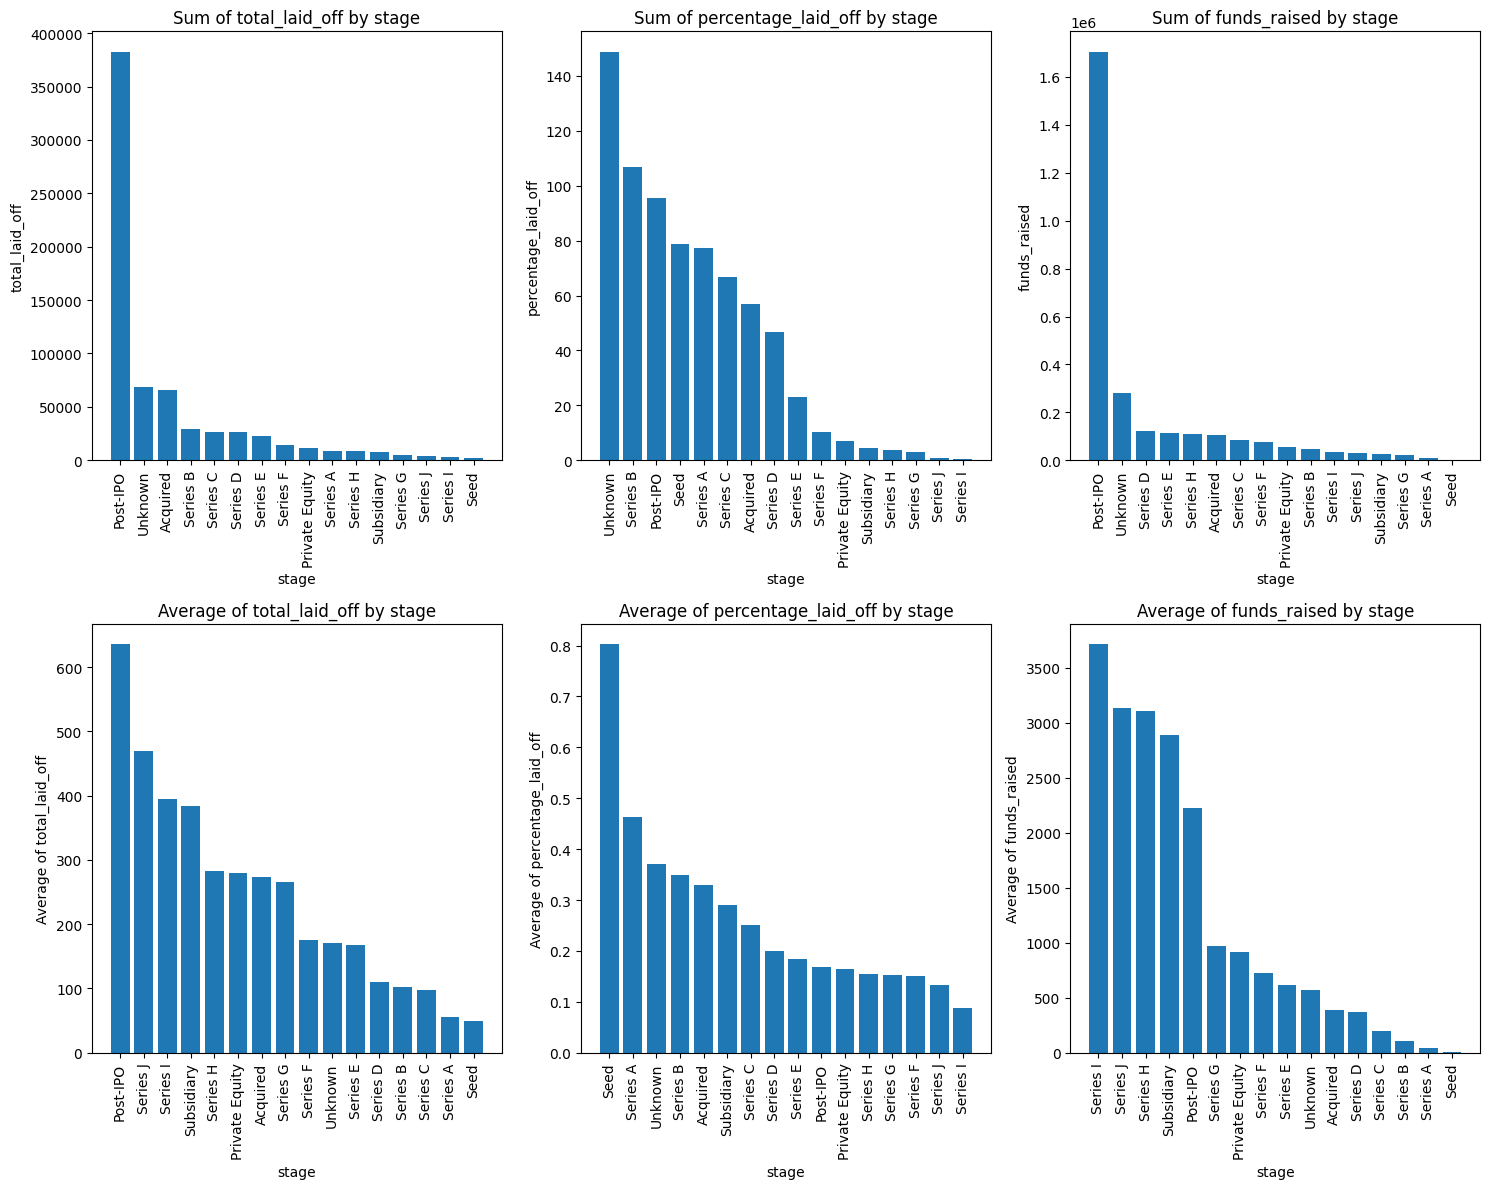

In [18]:
plot_barchart(df, "stage")

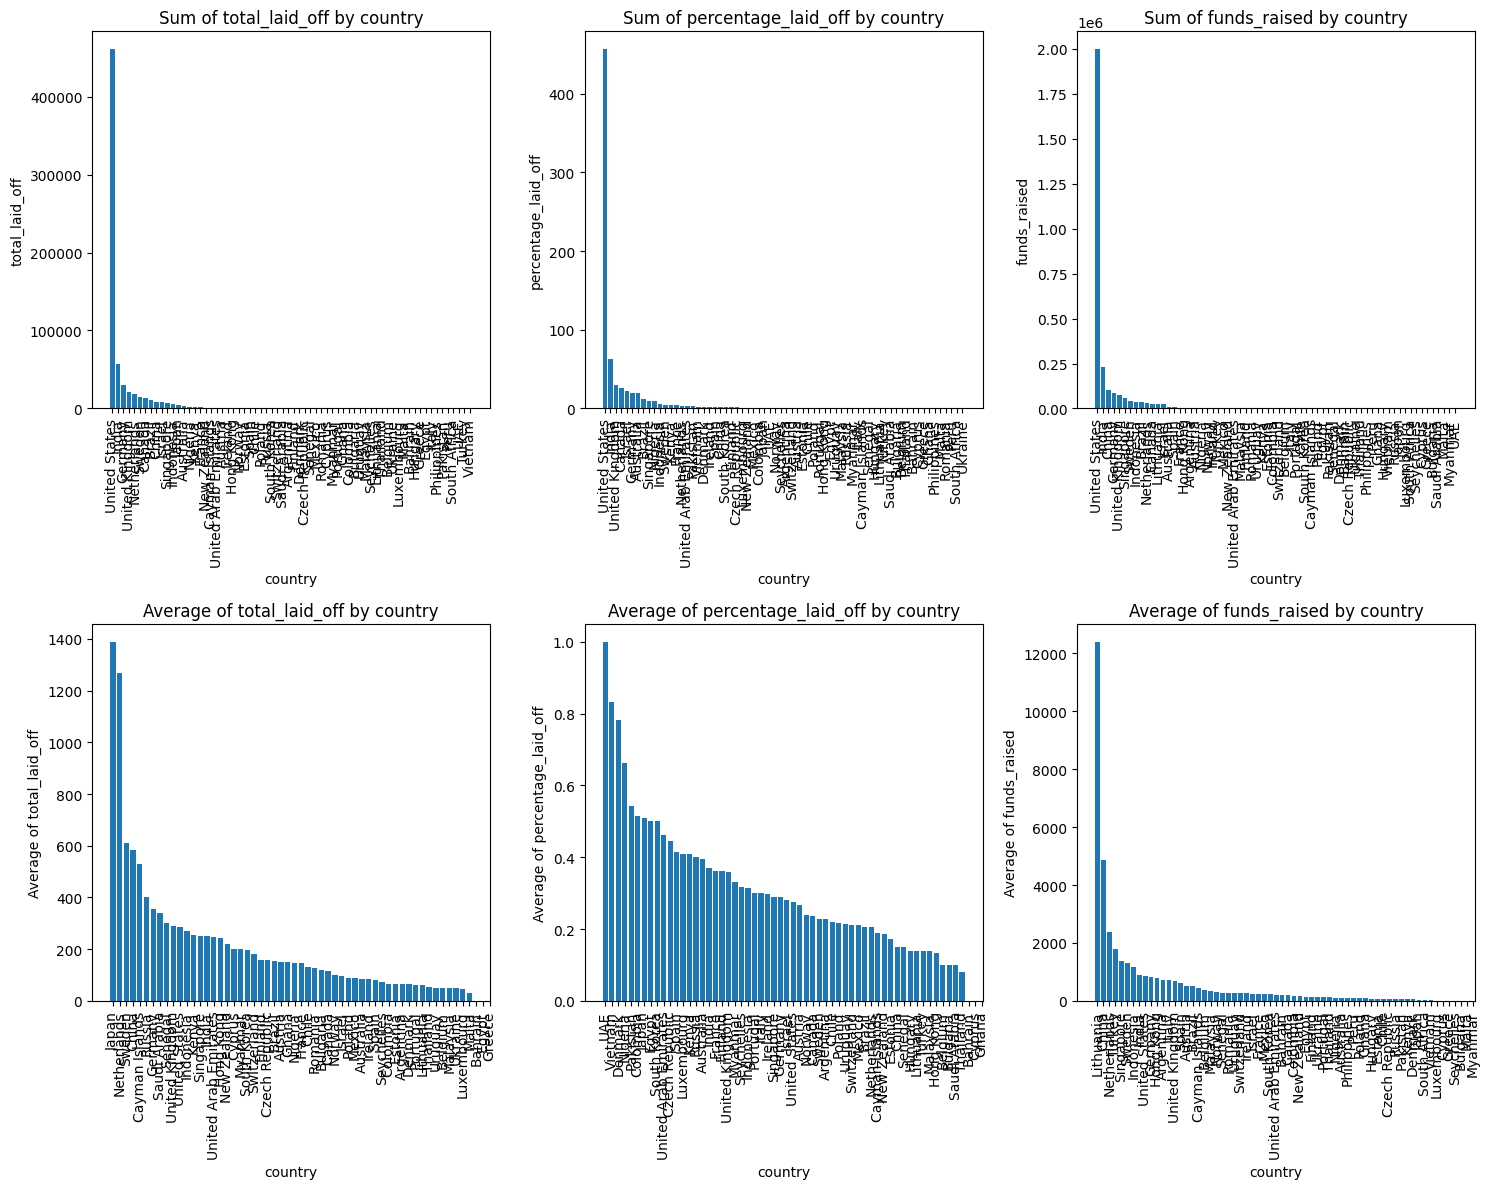

In [19]:
plot_barchart(df, "country")

In [20]:
df["country"].unique()

array(['United States', 'Israel', 'Canada', 'Portugal', 'Germany',
       'India', 'Sweden', 'France', 'Singapore', 'Nigeria',
       'United Kingdom', 'Netherlands', 'Norway', 'Malta', 'Indonesia',
       'Cyprus', 'UAE', 'Ireland', 'Austria', 'China', 'Kenya',
       'Pakistan', 'Uruguay', 'Spain', 'Japan', 'Czech Republic',
       'Belgium', 'Chile', 'Denmark', 'Lithuania', 'Australia', 'Poland',
       'Finland', 'Cayman Islands', 'Estonia', 'Romania', 'Switzerland',
       'Brazil', 'Ghana', 'Hong Kong', 'New Zealand', 'Luxembourg',
       'Mexico', 'South Korea', 'Saudi Arabia', 'Philippines', 'Ukraine',
       'Italy', 'Colombia', 'Argentina', 'Seychelles', 'Egypt', 'Greece',
       'Malaysia', 'Hungary', 'Vietnam', 'Thailand', 'Senegal',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia',
       'Bulgaria', 'South Africa', 'Myanmar'], dtype=object)

In [21]:
# Grouping location and summing each column values
country_summary = df.groupby('country')["total_laid_off"].sum().reset_index()
# Sorting in descending order for better visualisation
country_summary = country_summary.sort_values(by="total_laid_off", ascending=False)
country_summary

,country,total_laid_off
63,United States,460638.0
24,India,56631.0
19,Germany,30502.0
62,United Kingdom,20840.0
37,Netherlands,19005.0
...,...,...
42,Peru,0.0
52,South Africa,0.0
59,UAE,0.0
58,Turkey,0.0


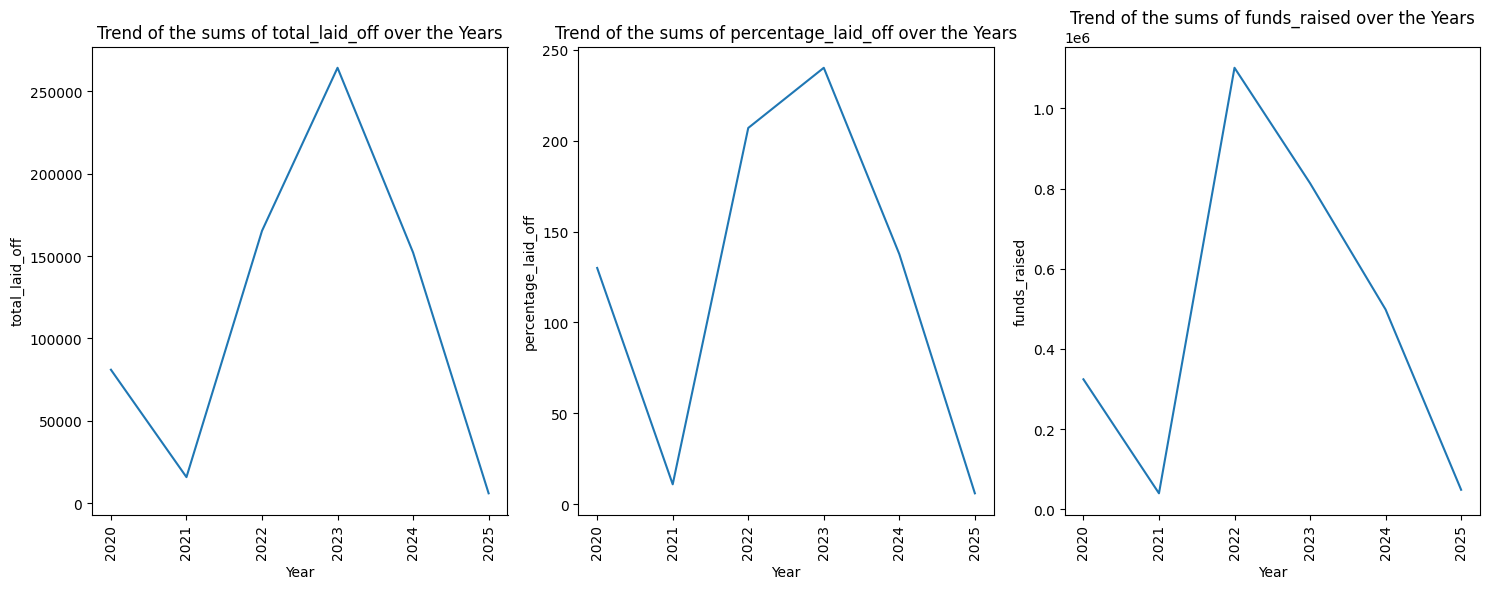

In [22]:
#Yearly Trends

num_plots = len(numerical_df.columns)  
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust row count

plt.figure(figsize = (15,6))
for i, column in enumerate(numerical_df.columns):
    #data_to_plot = df.dropna(subset=[column])
    plt.subplot(rows,3,i+1)

    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['year'] = df['date'].dt.year # Extract the year
    # Grouping location and summing each column values
    yearly_summary = df.groupby('year')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    yearly_summary = yearly_summary.sort_values(by='year', ascending=False)
    
    plt.plot(yearly_summary['year'], yearly_summary[column], label=column)
    plt.title(f"Trend of the sums of {column} over the Years")
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility
    #axes[i].bar(data_to_plot[column],data_to_plot['industry'])
plt.tight_layout() # adjusts plot to fit labels
plt.show()

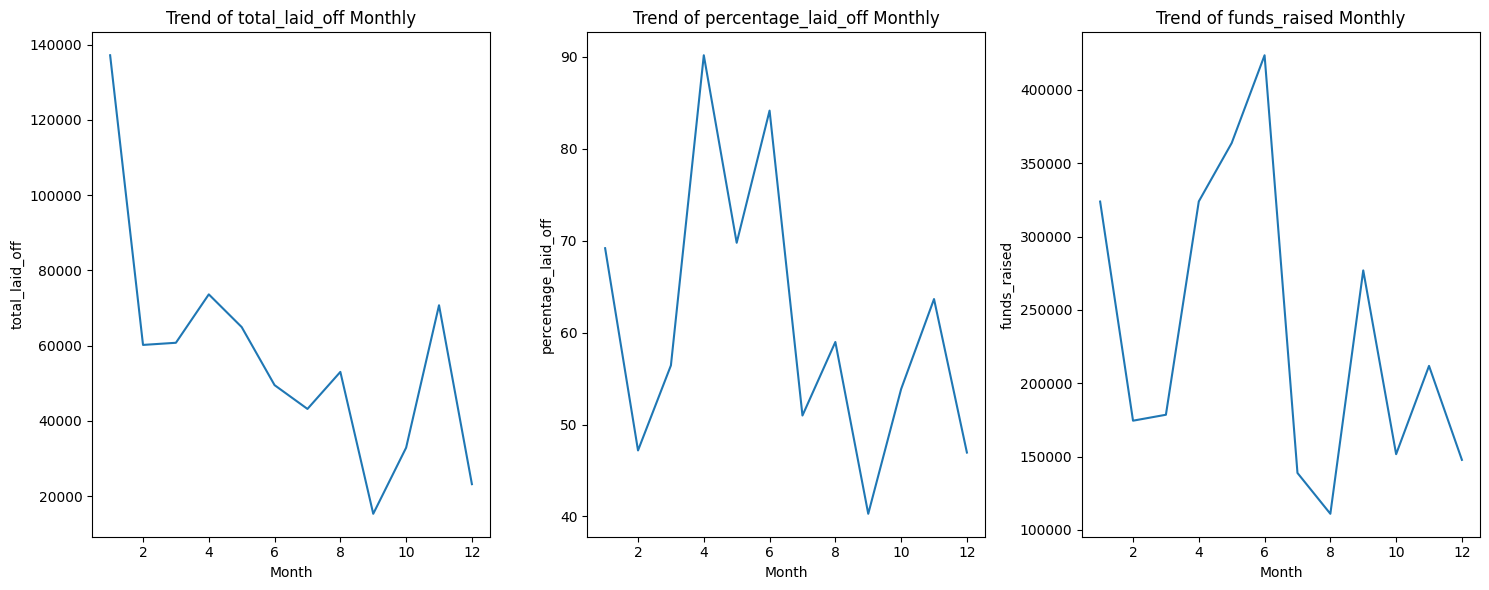

In [23]:
# Monthly Trends

num_plots = len(numerical_df.columns)  
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust row count

plt.figure(figsize = (15,6))
for i, column in enumerate(numerical_df.columns):
    #data_to_plot = df.dropna(subset=[column])
    plt.subplot(rows,3,i+1)

    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month_num'] = df['date'].dt.month # Extract the month
    df['month_name'] = df['date'].dt.month_name
    # Grouping location and summing each column values
    monthly_summary = df.groupby('month_num')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    #month_order = ['January', 'February', 'March', 'April', 'May', 'June','July',
      #             'August', 'September', 'October', 'November', 'December']
    monthly_summary = monthly_summary.sort_values(by='month_num', ascending=True)

    #group_data = group_data.set_index('month').re_index(month_order) # Reorder months
    
    plt.plot(monthly_summary['month_num'], monthly_summary[column])
    plt.title(f"Trend of {column} Monthly")
    plt.xlabel('Month')
    plt.ylabel(column)
    #plt.xticks(rotation=90) # Rotate x labels for better visibility
    
plt.tight_layout() # adjusts plot to fit labels
plt.show()

In [24]:
# Group Funds Raised into Intervals
def funds_interval(row):
    if row['funds_raised'] < 10: return "A: 0-10"
    elif row['funds_raised'] < 25: return "B: 10-25"
    elif row['funds_raised'] < 50: return "C: 25-50"
    elif row['funds_raised'] < 100: return "D: 50-100"
    elif row['funds_raised'] < 250: return "E: 100-250"
    elif row['funds_raised'] < 500: return "F: 250-500" 
    elif row['funds_raised'] < 1000: return "G: 500-1000"
    elif row['funds_raised'] < 2000: return "H: 1000-2000"
    elif row['funds_raised'] < 4000: return "I: 2000-4000"
    else: return "J: 4000+"

df['funds_interval'] = df.apply(funds_interval, axis=1)

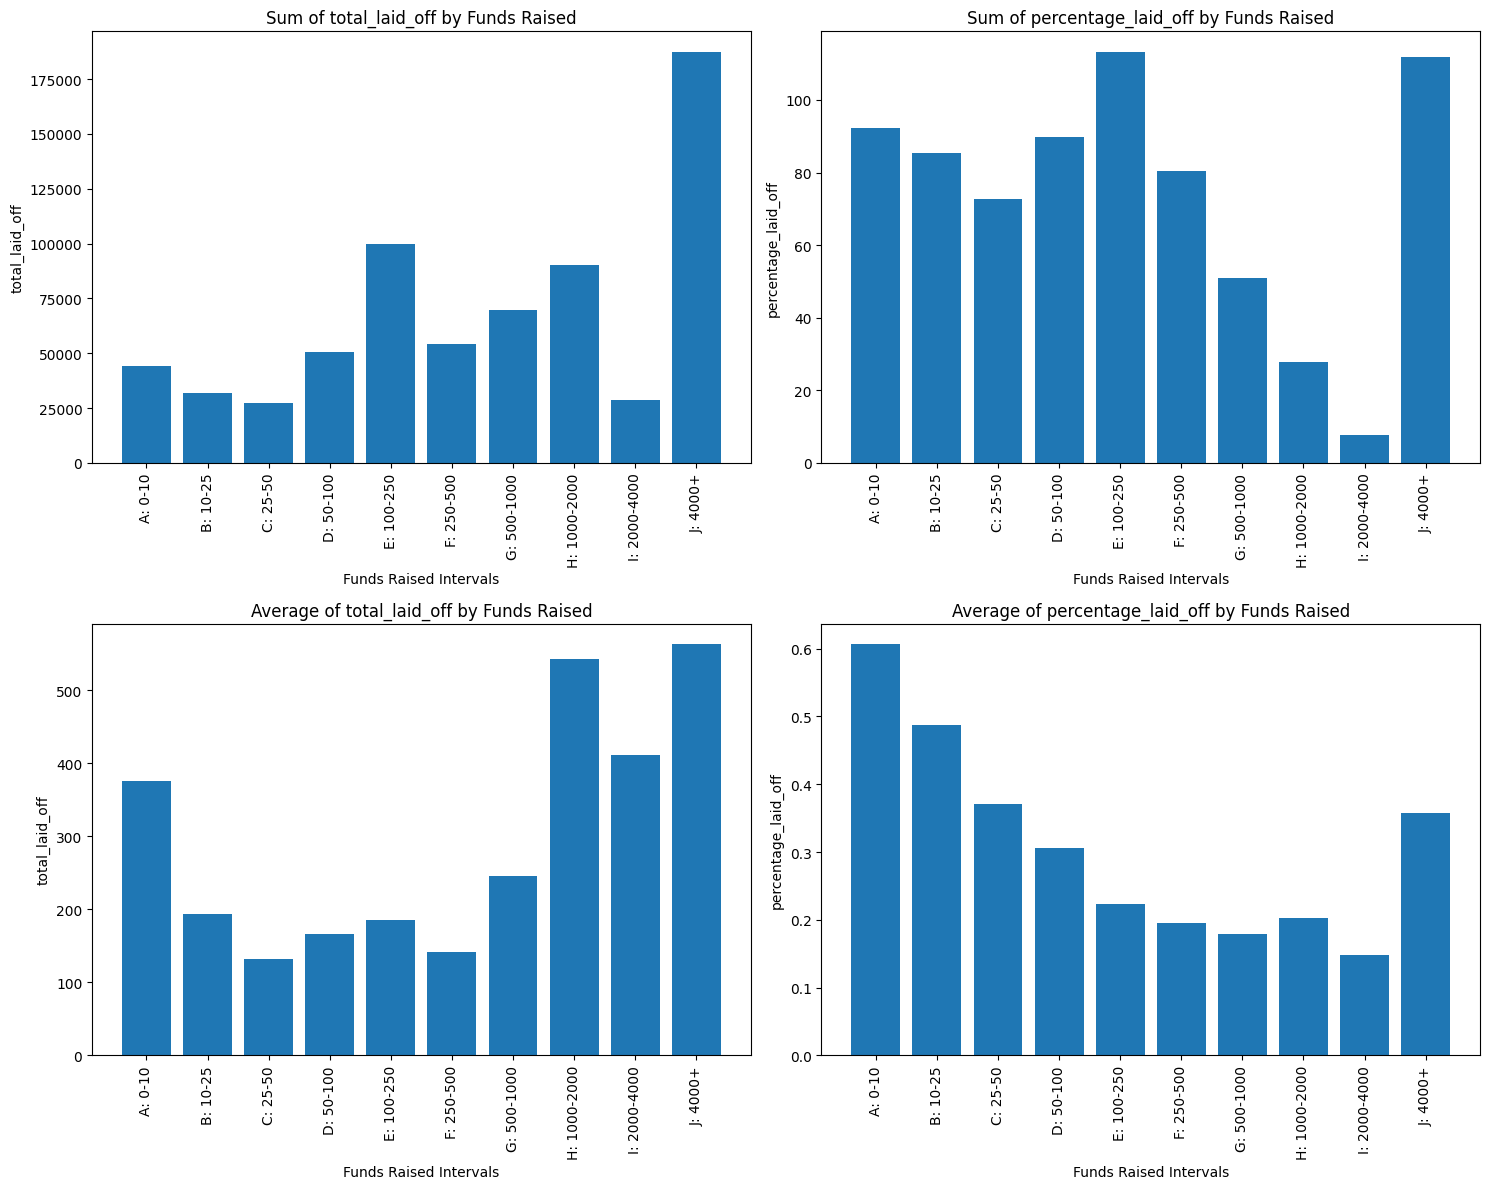

In [25]:
# Plot Bar Charts : Values by Funds Raised
plt.figure(figsize = (15,12))
for i, column in enumerate(numerical_df.columns[:2]):
    
    plt.subplot(2,2,i+1)
    
    # Grouping location and summing each column values
    funds_summary = df.groupby('funds_interval')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    funds_summary = funds_summary.sort_values(by='funds_interval', ascending=True)
    
    plt.bar(funds_summary['funds_interval'],funds_summary[column])
    plt.title(f"Sum of {column} by Funds Raised")
    plt.xlabel('Funds Raised Intervals')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility

    plt.subplot(2,2,i+3)
    
    # Grouping location and summing each column values
    funds_average = df.groupby('funds_interval')[column].mean().reset_index()
    # Sorting in descending order for better visualisation
    funds_average = funds_average.sort_values(by='funds_interval', ascending=True)
    
    plt.bar(funds_average['funds_interval'],funds_average[column])
    plt.title(f"Average of {column} by Funds Raised")
    plt.xlabel('Funds Raised Intervals')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility
    
plt.tight_layout() # adjusts plot to fit labels
plt.show()       

In [26]:
# Number of Companies
len(df['company'].unique())

2745

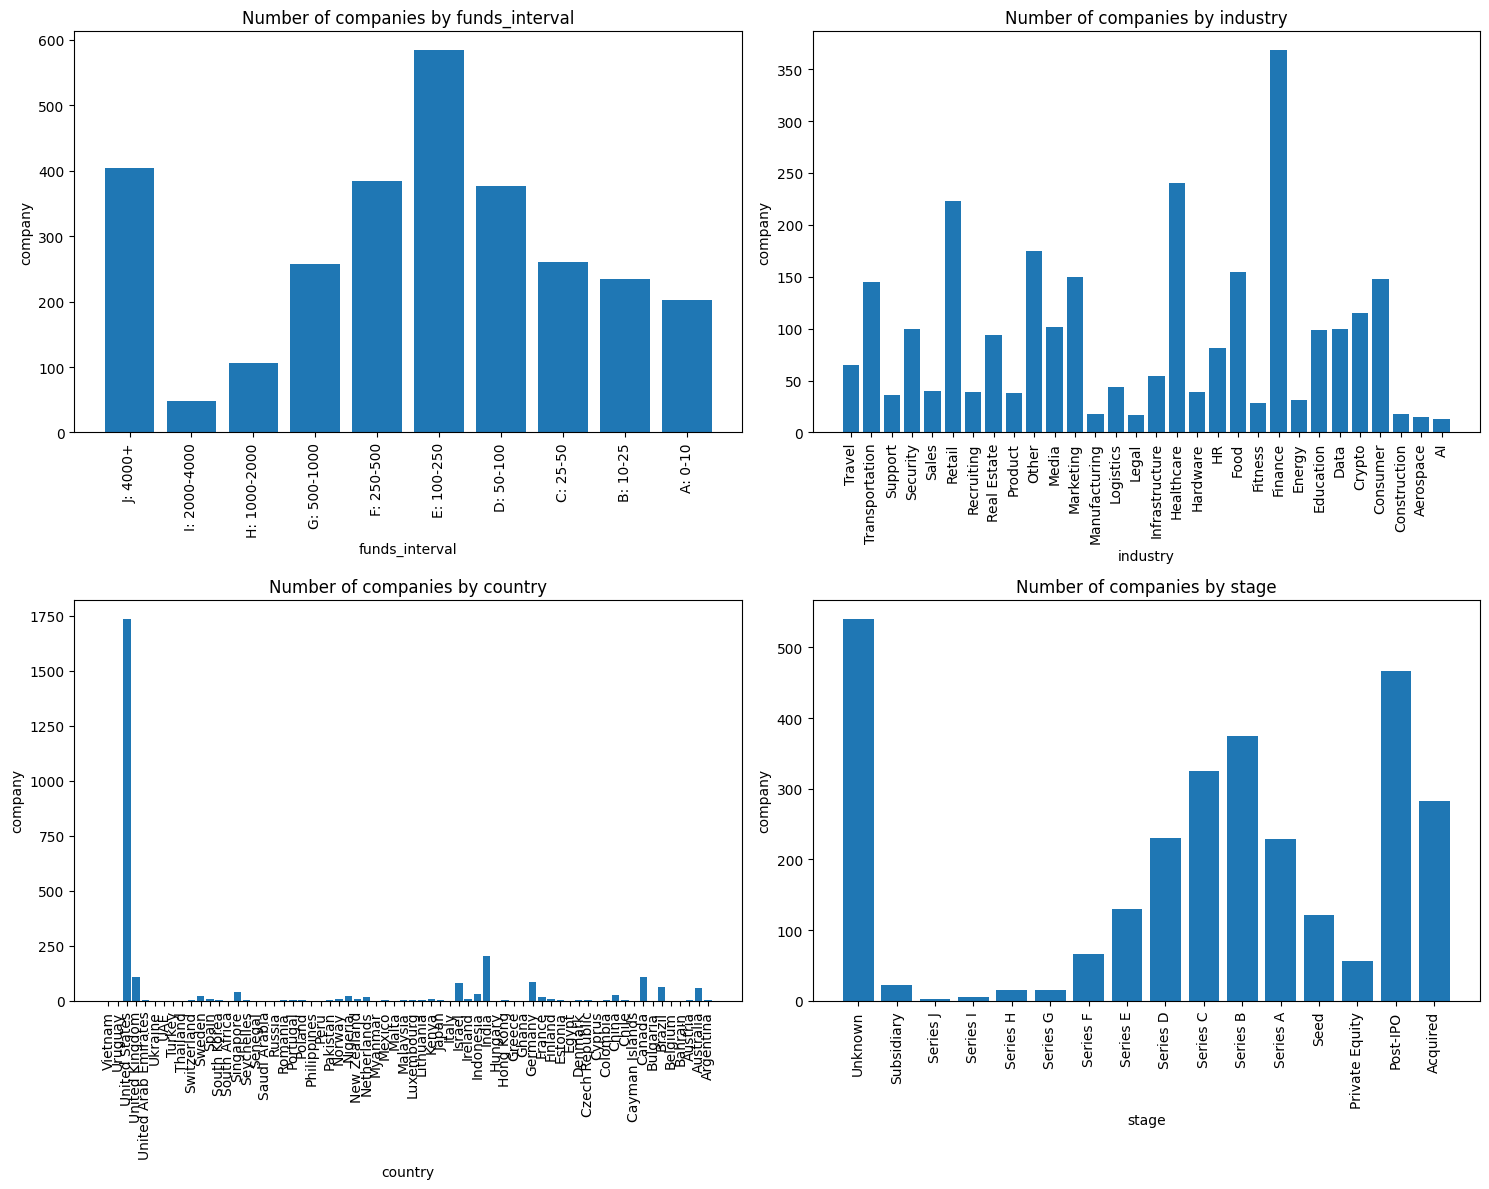

In [27]:
# Plot Bar Charts
# Number of Companies per (fund interval, industry, country, stage)

xcolumns = ['funds_interval', 'industry', 'country', 'stage']
rows = (len(xcolumns) // 2) + (len(xcolumns) % 2 > 0)  # Adjust row count

plt.figure(figsize = (15,12))
for i,column in enumerate(df[xcolumns]):
    #data_to_plot = df.dropna(subset=[column])
    plt.subplot(rows,2,i+1)
    
    # Grouping xcolumn and summing number of unique companies
    xcolumn_summary = df.groupby(column)['company'].nunique().reset_index()
    # Sorting in descending order for better visualisation
    xcolumn_summary = xcolumn_summary.sort_values(by=column, ascending=False)
    
    plt.bar(xcolumn_summary[column],xcolumn_summary['company'])
    plt.title(f"Number of companies by {column}")
    plt.xlabel(column)
    plt.ylabel('company')
    plt.xticks(rotation=90) # Rotate x labels for better visibility
  
plt.tight_layout() # adjusts plot to fit labels
plt.show()       

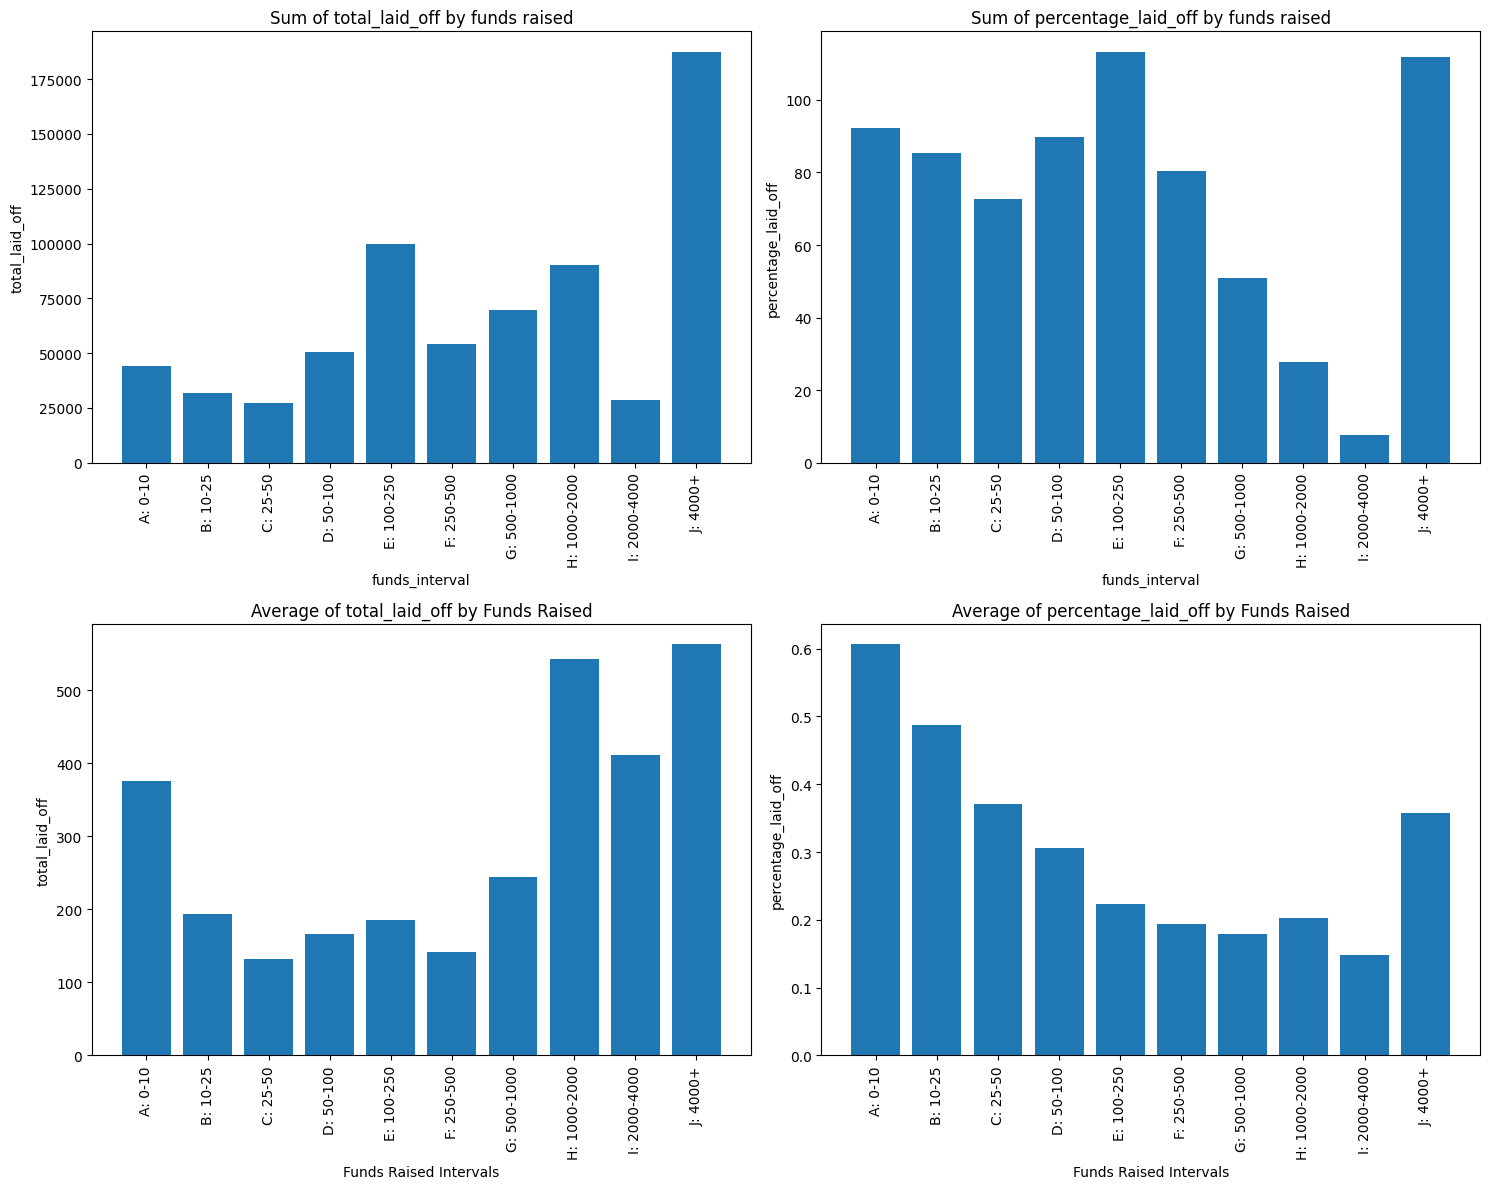

In [28]:
# Can do a line or scatter plot of layoffs vs funds raised

plt.figure(figsize = (15,12))
for i, column in enumerate(df[['total_laid_off','percentage_laid_off']]):
   
    plt.subplot(2,2,i+1)
    
    # Grouping funds interval and summing each column values
    funds_summary = df.groupby('funds_interval')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    funds_summary = funds_summary.sort_values(by='funds_interval', ascending=True)
    
    plt.bar(funds_summary['funds_interval'],funds_summary[column])
    plt.title(f"Sum of {column} by funds raised")
    plt.xlabel('funds_interval')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility

    # Average plots in row 2
    plt.subplot(2,2,i+3)
    
    # Grouping location and summing each column values
    funds_average = df.groupby('funds_interval')[column].mean().reset_index()
    # Sorting in descending order for better visualisation
    funds_average = funds_average.sort_values(by='funds_interval', ascending=True)
    
    plt.bar(funds_average['funds_interval'],funds_average[column])
    plt.title(f"Average of {column} by Funds Raised")
    plt.xlabel('Funds Raised Intervals')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility
    
plt.tight_layout() # adjusts plot to fit labels
plt.show()       

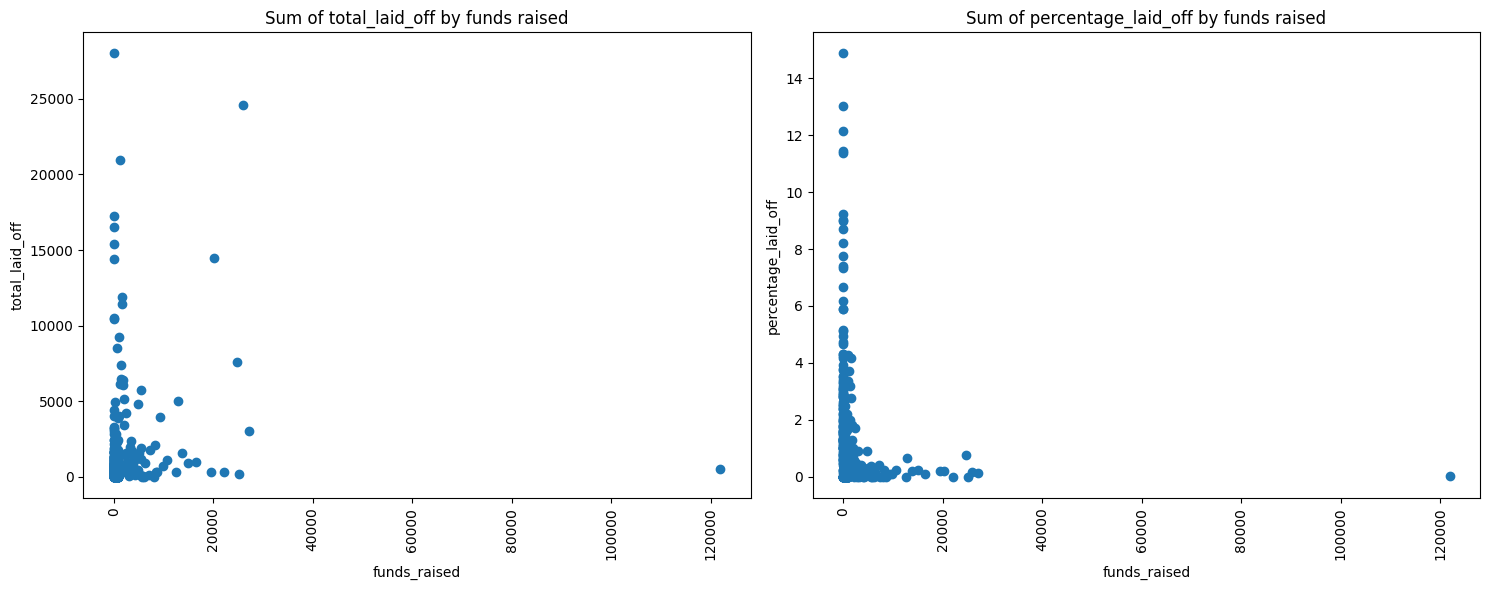

In [29]:
# Can do a line or scatter plot of layoffs vs funds raised

plt.figure(figsize = (15,6))
for i, column in enumerate(df[['total_laid_off','percentage_laid_off']]):
    #data_to_plot = df.dropna(subset=[column])
    plt.subplot(1,2,i+1)
    
    # Grouping location and summing each column values
    fund_summary = df.groupby('funds_raised')[column].sum().reset_index()
    # Sorting in descending order for better visualisation
    fund_summary = fund_summary.sort_values(by=column, ascending=False)
    
    plt.scatter(fund_summary['funds_raised'],fund_summary[column])
    plt.title(f"Sum of {column} by funds raised")
    plt.xlabel('funds_raised')
    plt.ylabel(column)
    plt.xticks(rotation=90) # Rotate x labels for better visibility
    #axes[i].bar(data_to_plot[column],data_to_plot['industry'])
plt.tight_layout() # adjusts plot to fit labels
plt.show()       

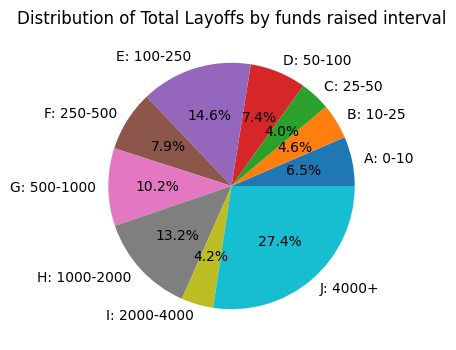

In [30]:
# A pie chart for Funds interval

# Grouping funds interval and summing each column values
funds_summary = df.groupby('funds_interval')['total_laid_off'].sum().reset_index()
plt.figure(figsize=(4,4))
plt.pie(funds_summary['total_laid_off'], labels=funds_summary['funds_interval'], autopct='%1.1f%%')
plt.title('Distribution of Total Layoffs by funds raised interval')
plt.show()